### Looking at combined station CTD cast data

 - for regression analysis of O2 and beam transmission
 - processed from 1 m binned Seabird cnv files in 2018_St32_P2_individual notebook, which created csvs
 - that processing also created a combined station file with all cast data from that station occupation
 
 - in 2018_St32_P2_density, we saw that the deep chl max stays in the 25.7-26.2 range. So we'll sum first the chl in that range to look at chl over time during the station occupation (April 15-20).

In [21]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [22]:
cd ~/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804/

/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804


In [23]:
# read into dataframe with Pressure (depth) as the index
p2_combine = pd.read_csv('Station32_combined_casts.csv', index_col=0)

# read into dataframe with Time (UTC) as the index
#p2_combine = pd.read_csv('Station32_combined_casts.csv', index_col=33)

p2_combine.head()

,StartTime,timeS,scan,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,...,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS,flag,Time
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
10.060,2018-04-15 05:12:33,28.406,683.0,-107.00062,16.90048,10.0,26.6322,26.6326,5.402263,5.402444,...,2.7527,34.4507,34.4517,22.4215,22.4222,6.5181,199.225,98.638,False,2018-04-15 05:13:01.406
11.066,2018-04-15 05:12:33,99.969,2400.0,-107.00062,16.90048,11.0,26.6327,26.6328,5.402342,5.402516,...,2.7537,34.4507,34.4518,22.4214,22.4222,6.5252,199.444,98.747,False,2018-04-15 05:14:12.969
12.072,2018-04-15 05:12:33,104.055,2498.0,-107.00062,16.90048,12.0,26.6372,26.6373,5.403420,5.403521,...,2.7534,34.4547,34.4554,22.4230,22.4236,6.5181,199.227,98.649,False,2018-04-15 05:14:17.055
13.078,2018-04-15 05:12:33,107.870,2590.0,-107.00062,16.90048,13.0,26.6368,26.6372,5.403477,5.403670,...,2.7519,34.4551,34.4562,22.4236,22.4242,6.5210,199.314,98.691,False,2018-04-15 05:14:20.870
14.084,2018-04-15 05:12:33,109.071,2619.0,-107.00062,16.90048,14.0,26.6375,26.6378,5.403666,5.403869,...,2.7546,34.4556,34.4569,22.4238,22.4247,6.5238,199.400,98.736,False,2018-04-15 05:14:22.071


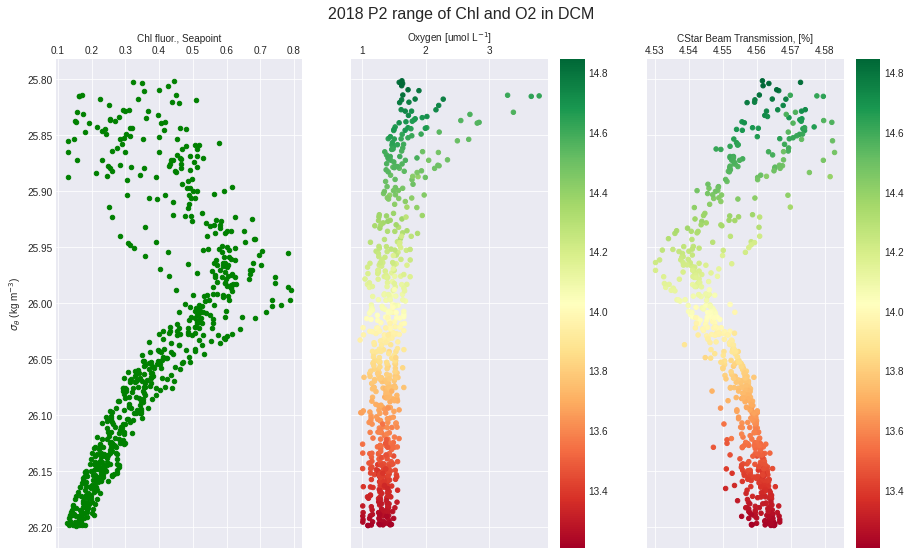

In [29]:
# slice the dataframe to be just the deep chlorophyll maximum
p2_dcm = p2_combine[p2_combine['sigma-�00'].between(25.8,26.2)]

# plot the range of chlorophyll, O2, beam transmission values in the DCM 

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

# Chl

p2_dcm.plot(ax = ax1, kind='scatter', x='flSP', y= 'sigma-�00', c='Green')
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Chl fluor., Seapoint')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(True)

# Oxygen

p2_dcm.plot(ax = ax2, kind='scatter', x='sbox0Mm/Kg', y= 'sigma-�00', c = p2_dcm.t090C, cmap = cm.RdYlGn)
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Oxygen [umol L$^{-1}$]')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Beam transmission

p2_dcm.plot(ax = ax3, kind='scatter', x='CStarTr0', y= 'sigma-�00', c = p2_dcm.t090C, cmap = cm.RdYlGn)
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('CStar Beam Transmission, [%]')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(True);

In [33]:
# plot the range of chlorophyll, O2, beam transmission values in the DCM over time

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=True, figsize=(15,9))

fig2.suptitle('2018 P2 range of Chl and O2 in DCM', fontsize=16, y = 0.96)

# Chl

p2_dcm.plot(ax = ax1, kind='scatter', x='Time', y= 'flSP', c='Green')
#ax1.plot(temp,depth,'o-')
ax1.set_ylabel('Chl fluor., Seapoint')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Time')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(True)

# Oxygen

p2_dcm.plot(ax = ax2, kind='scatter', x='Time', y= 'sbox0Mm/Kg', c = "Red")
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Oxygen [umol L$^{-1}$]')
#ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Time')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Beam transmission

p2_dcm.plot(ax = ax3, kind='scatter', x='Time', y= 'CStarTr0', c = "Blue")
#ax3.plot(temp,depth,'o-')
ax3.set_ylabel('CStar Beam Transmission, [%]')
#ax3.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.grid(True);

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-33-0ce473fbec62>, line 16)